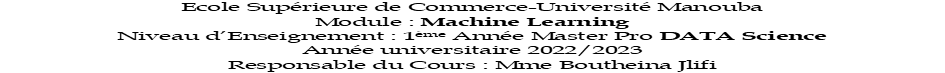

# TP2

Il s'agit d'un projet de prédiction d'attribution de Crédits Habitat à une clientèle d'une Banque.

On va suivre ce qu'on appelle un data science/machine learning pipeline. Pour commencer, on va explorer 2 datasets qui accompagnent cette phase. Avant de passer au prétraitement, on va:

Etape1- Compréhension du problème et exploration des variables de nos datasets

Etape2- émission des hypothèses

Etape3- Analyse Exporatoire des Données (AED) ou bien Exploratory Data Analysis (EDA)
       
       i)  Analyse Univariée 

       ii) Analyse Bivariée 



## Etape1 


Afin de comprendre le problème à traiter, il s'agit de l'Exploration des variables de nos datasets.

Il faut importer la bibliothèque Pandas de Python ainsi qu'une panoplie de bibliothèques dont on aura besoin après.


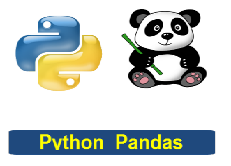

In [1]:
import pandas as pd # c'est pour manipuler les dataframes
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# C'est un commentaire sur une seule ligne
#  pd est un objet de type pandas déclaré en haut pour pouvoir évoquer des méthodes de 
# la bibliothèque Pandas: on aurait pu l'appeler x
# df1 est un objet de type dataframe: cadre de données. On va manipuler des dataframes
#  read_csv permet d'ouvrir le dataset contenu dans le fichier "Partie1DatasetTP2.csv" et de mettre le contenu dans df1
# Il faut indiquer le chemin d'accès si c'est nécessaire exemple c:/mesTps...
""" c'est un 
commentaire sur plusieurs lignes avec python"""
df1 = pd.read_csv("Partie1DatasetTP2.csv") 
print ("fichier ouvert le")
from datetime import datetime
now = datetime.now()
print (now)

fichier ouvert le
2022-10-19 19:56:23.684877


In [3]:
#Affichage du contenu du dataframe df1 qu'on a crée à partir de notre fichier .csv
#On peut utiliser print également mais 
#le nom du dataframe tt court est plus pratique
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df1.head(2)  # vous pouvez afficher un autre nombre au lieu de 2, si vous ne mettez rien il affiche les 5 premiers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
#On va afficher les infos relatives à notre dataset tels que le nombre d'attributs, les types...
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
print ("les dimensions du datset sont (nombre de ligne,nombre de colonnes)=",df1.shape)

les dimensions du datset sont (nombre de ligne,nombre de colonnes)= (614, 13)


In [8]:
nomfich= r"monfich.csv"
df1.to_csv('nomfich.csv', index=False)

### Etape1: Activité1
1-Citer et détailler les variables catégorielles  de ce dataset 


2-Citer et détailler les variables numériques de ce dataset


### Etape1: Activité2
1-Afficher le contenu de df2 qui va contenir le résultat de l'ouverture du fichier csv intitulé "Partie2DatasetTP2.csv", sa forme, ses colonnes, son entête

2-Quelles sont les différences entre les 2 dataframes: nombre d'attributs et contenu en général


4-Quelles sont les variables cibles et les variables explicatives

## Etape2 : Emission des hypothèses

## Etape3: AED

### A- Analyse univariée des variables

### A-1Variable cible

In [9]:
df1["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
df1["Loan_Status"].value_counts()[1] # si on veut afficher le nombre d'éléments du 2ème type  

192

Le pourcentage de classe Y (acceptation de crédit) : 0.69
Le poucentage de classe N (Refus de crédit) : 0.31


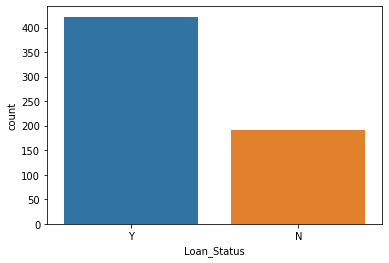

In [11]:

sns.countplot(x='Loan_Status', data = df1);
# On peut mettre aussi 
#sns.countplot(df1['Loan_Status']);
print('Le pourcentage de classe Y (acceptation de crédit) : %.2f' % (df1['Loan_Status'].value_counts()[0] / len(df1)))
print('Le poucentage de classe N (Refus de crédit) : %.2f' % (df1['Loan_Status'].value_counts()[1] / len(df1)))

#On peut considérer que c'est un datset imbalanced 

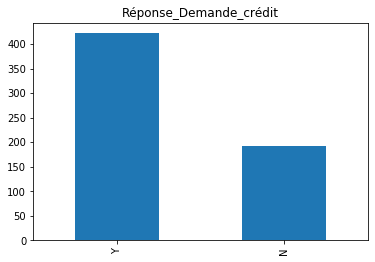

In [12]:
#df1["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Réponse_Demande_crédit') ou
df1["Loan_Status"].value_counts().plot.bar(title = 'Réponse_Demande_crédit')

### A-2 Variables indépendantes catégorielles

In [13]:
# Variable indépendante caégorielle genre ou "Gender"
df1["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
# Variable indépendante catégorielle Historique de crédit ou"Credit_History"
df1["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

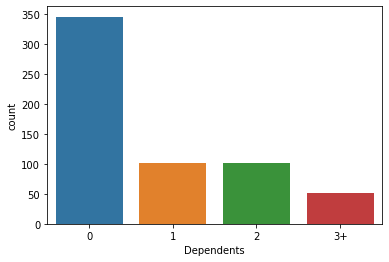

In [15]:
#df1['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")
#'''ou bien'''
sns.countplot(x='Dependents', data = df1);

### Etape3: Activité1 

### A-3 Variables numériques


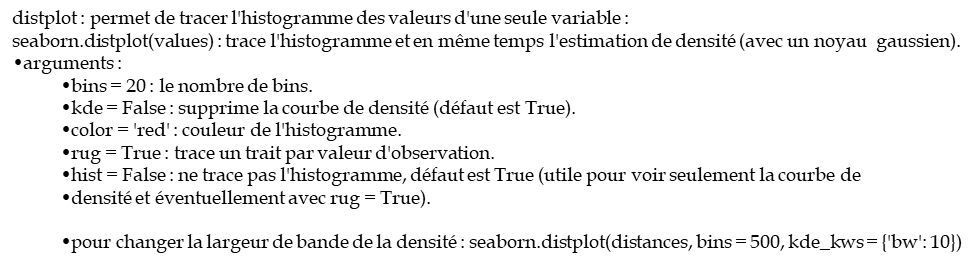

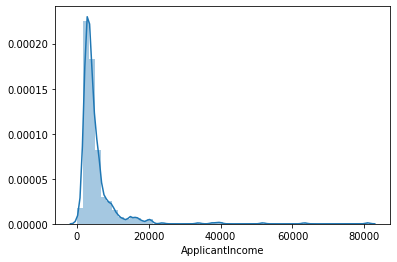

In [16]:
sns.distplot(df1["ApplicantIncome"]);


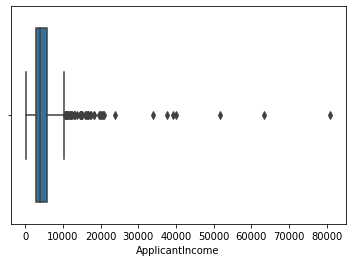

In [17]:
sns.boxplot(df1["ApplicantIncome"])

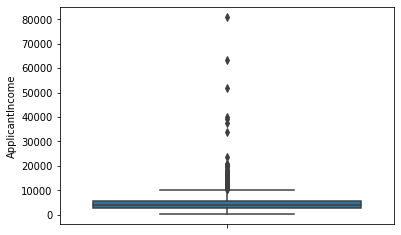

In [18]:
#Si on veut changer l'orientation
sns.boxplot(x=df1["ApplicantIncome"],orient='v')

### Comment interpréter une boîte à moustache 

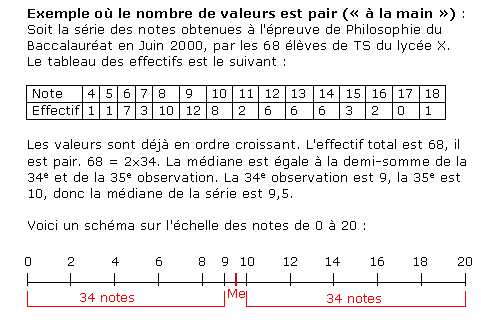

Boîte à moustaches
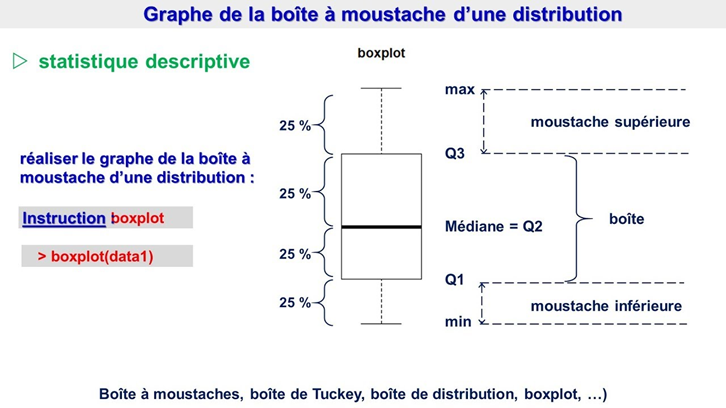

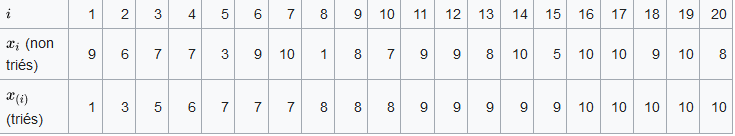

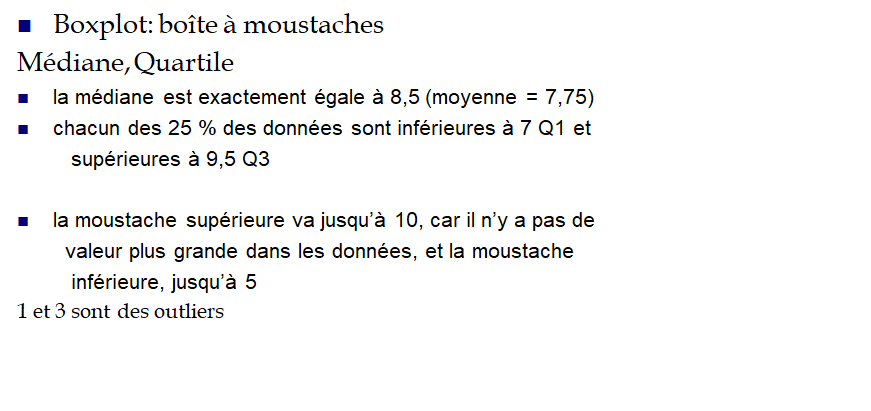

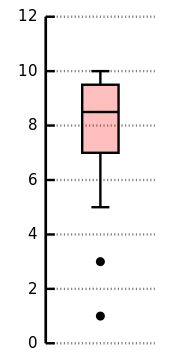

In [19]:
print(df1.describe(include='number')) #ça nous aide pour lire les valeurs des médianes, quartiles Q1, Q3
# print(df1.describe(include='object')) #pour les var catégorielles...

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [20]:
#Si on veut explorer les valeurs d'une variable spécifique pour bien interpréter le boxplot
df1['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

# Récapitulons (PartieA): Analyse univariée

### B-Analyse bi-variée

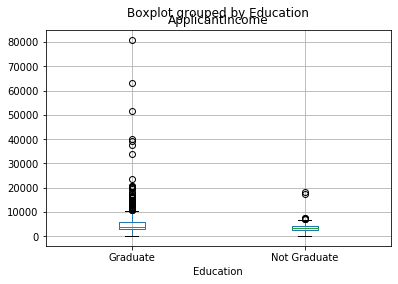

In [21]:
# c'est une analyse bi-variée entre le salaire et l'éducation 
df1.boxplot(column='ApplicantIncome',by="Education" )  


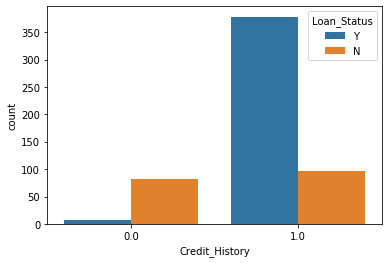

In [22]:
#Credit_History
sns.countplot(x='Credit_History', hue='Loan_Status', data=df1, linewidth=5);

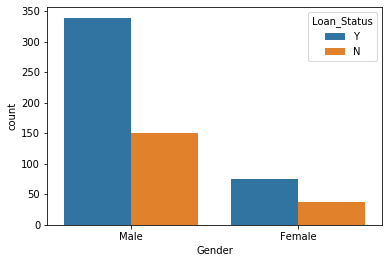

In [23]:
sns.countplot(x='Gender', hue='Loan_Status', data=df1, linewidth=5);

# majorité des hommes ont eu un crédit et une majorité de femmes aussi: il n'y a pas un modèle (No pattern)

# Ce n'est pas un important feature...

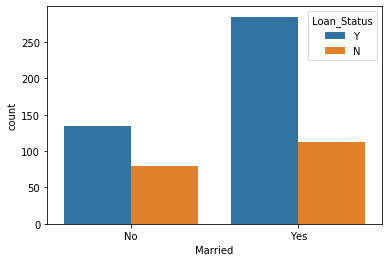

In [24]:
sns.countplot(x='Married', hue='Loan_Status', data=df1, linewidth=5);
# ou avec couleurs
#sns.countplot(x='Married', hue='Loan_Status', data=df1, color="deeppink", linewidth=5);


In [25]:
# Dependents
# Donner le code nécessaire


# Discussion: Si Dependents = 0 , on a beaucoup plus de chances d'avoir un crédit ((very high chance))


In [26]:
# Education
# Donner le code nécessaire


# Si vous êtes garduate ou pas, vous avez presque la même chance d'avoir un crédit (No pattern)
# La majorité des gens éduqués (graduate) ont eu un crédit
# Les personnes not graduate ont eu un crédit, mais avec moins de pourcentage
# Les personnes garduate sont plus nombreuses à avoir un refus de crédit!


C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


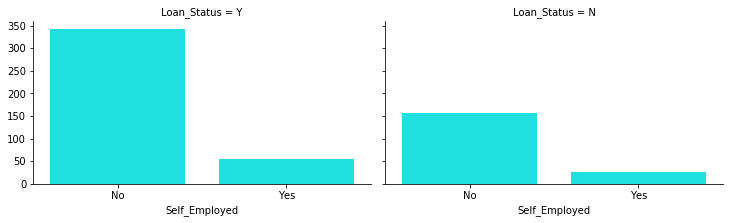

In [27]:
# Self_Employed et Loan_Status
# c'est une autre manière de faire des bar plot (culturel)
# Donner une interprétation
grid = sns.FacetGrid(df1,col='Loan_Status', height =3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed', color="aqua")


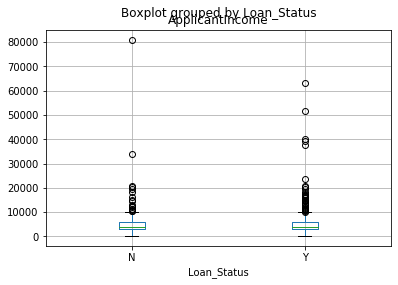

In [28]:
#ApplicantIncome et Loan_Status
df1.boxplot(column='ApplicantIncome',by="Loan_Status" )

### Etape3: Activité2
 Terminer votre analyse bi-variée et faire les inductions nécessaires

# Correlation entre variables

In [29]:
#On va changer le type de loan_status pour pouvoir calculer sa corrélation avec les autres variables numériques du dataset
df1["Loan_Status"]= df1["Loan_Status"].replace("Y",1)
df1["Loan_Status"]= df1["Loan_Status"].replace("N",0)

df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


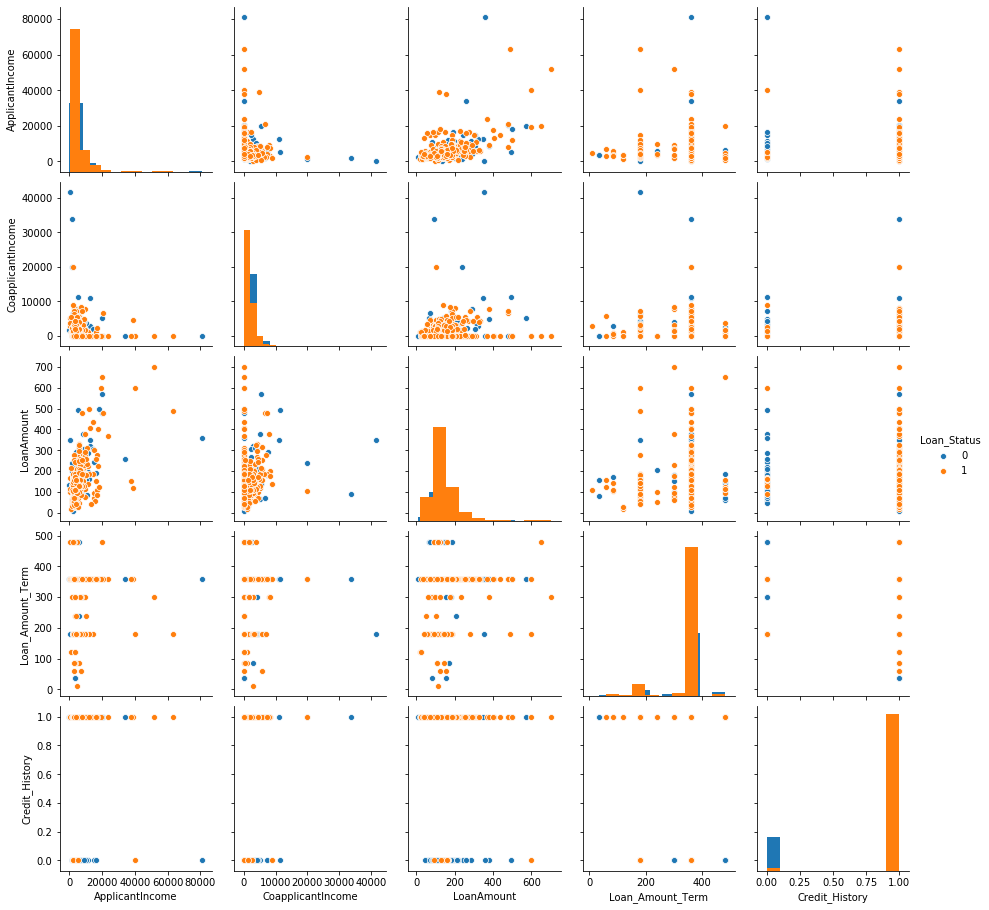

In [31]:
#On peut mettre le paramètre hue ou pas...
sns.pairplot(df1, hue="Loan_Status",diag_kind="hist" )

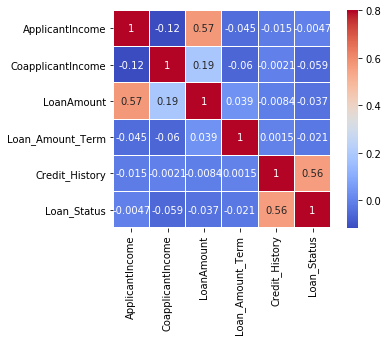

In [32]:
#sns.heatmap(df1.corr()) ou
#plt.figure(figsize=(15, 10)) #vous pouvez utiliser cette instruction pour gérer la taille de la matrice
matrix = df1.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap="coolwarm",annot=True,linewidths=.1);

### Etape3: Activité3
On vous demande de faire les interprétations nécessaires et de changer le thème de la matrice de correlation.